<a href="https://colab.research.google.com/github/savioramos1/Portfolio_DataScience/blob/main/An%C3%A1lise_da_Criminalidade_no_RJ_no_ano_de_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos dados de Criminalidade no Rio de Janeiro no ano de 2019

O Rio de Janeiro é uma das cidades brasileiras mais conhecida mundialmente, tendo incríveis atrações turísticas e linda beleza natural. No entanto, a cidade está sempre em evidência na mídia em relação a questões de **segurança pública**, esse problema assolam os cariocas a décadas.

O objetivo desse projeto é realizar uma **análise exploratória** dos dados referentes a criminalidade no Rio de Janeiro afim de obter alguns insights.

##Obtenção dos Dados

Para realização dessa análise, foi obtido os dados do [Kaggle](https://www.kaggle.com/datasets/victorcvriano/crimes-estado-rio-de-janeiro-2009-a-2019), no qual, foi extraido do [ISP Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html), uma base de dados abertos do Instituto de Segurança Publica de registros criminais e atividade policial do estado do Rio de Janeiro.

O dataset contém informações dos crimes no Rio de Janeiro no período de 2009 a 2019, o mesmo foi divido em quatro partes. Nesse projeto, iremos analisar apenas o ano de 2019.

In [ ]:
#Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')

# Importar o arquivo
file_path = "https://www.dropbox.com/s/828xprxvpoi66kg/parte4.csv?dl=1"


# Importar o arquivo para um DataFrame
df = pd.read_csv(file_path, sep=";", encoding='iso-8859-1')

rj = df.loc[df.ano == 2019] # selecionando somente os dados do ano de 2019
df_rj = pd.DataFrame(rj) # criando o dataset do RJ

###Variáveis a serem exploradas do dataset:


*   `ano`: ano da ocorrência
*   `mes`: mês da ocorrência
*   `hora`: hora do acontecimento da ocorrência
*   `Roubo a transeunte`: quantidade de ocorrências de roubo a transeunte
*   `idade`: Idade da vítima
*   `Roubo de veículo`: quantidade de ocorrências de roubo de veículos
*   `Furto a transeunte`: quantidade de ocorrências de furto a transeunte
*   `Furto de telefone celular`: quantidade de ocorrências de furto de telefone celular
*   `Furto de veículos`: quantidade de ocorrências de furto de veiculos
*   `Roubo em coletivo`: quantidade de ocorrências de roubo em coletivo
*   `Furto em coletivo`: quantidade de ocorrências de furto em coletivo
*   `Roubo de carga`: quantidade de ocorrências de roubo de carga
*   `Homicídio doloso`: quantidade de ocorrências de homecídio doloso





A primeira etapa da análise será imprimir as primeiras linhas para podemos visualizar a aparência do dataset.

In [ ]:
df_rj.head()

,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,data_fato,...,municipio_fato,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
451831,00255171-2019,2019,Janeiro,Roubo a transeunte,Roubo,casos,012a. Copacabana,012a. Copacabana,2019-01-01,2019-01-01,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
451832,00466231-2019,2019,Janeiro,Furto a transeunte,Furto,casos,012a. Copacabana,012a. Copacabana,2019-01-01,2019-01-01,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
451833,00490161-2019,2019,Janeiro,Furto a transeunte,Furto,casos,023a. Meier,005a. Mem de Sá,2019-01-01,2018-12-31,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
451834,00504871-2019,2019,Janeiro,Furto de veículos,Furto,casos,130a. Quissamã,130a. Quissamã,2019-01-01,2019-01-01,...,Carapebus,Praia,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
451835,00788311-2019,2019,Janeiro,Furto a transeunte,Furto,casos,005a. Mem de Sá,012a. Copacabana,2019-01-01,2018-12-31,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN


Verficando as últimas linhas do dataset.

In [ ]:
df_rj.tail()

,controle,ano,mes,titulo_do,total_rbft,conteudo,dp,cisp,data_com,data_fato,...,municipio_fato,local,sexo,data_nasc,cor,profissao,relacao,bairro_vit,municipio_vit,idade
701664,98774431-2019,2019,Dezembro,Furto de telefone celular,Furto,casos,052a. Nova Iguaçu,052a. Nova Iguaçu,2019-12-31,2019-11-28,...,Nova Iguaçu,Outros,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
701665,98930091-2019,2019,Dezembro,Roubo de carga,Roubo,casos,073a. Neves,073a. Neves,2019-12-31,2019-12-30,...,São Gonçalo,Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
701666,99347581-2019,2019,Dezembro,Roubo de aparelho celular,Roubo,casos,054a. Belford Roxo,064a. Vilar dos Teles,2019-12-31,2019-12-31,...,São João de Meriti,Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
701667,99563211-2019,2019,Dezembro,Roubo de veículo,Roubo,casos,048a. Seropédica,041a. Tanque,2019-12-31,2019-12-30,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN
701668,99585861-2019,2019,Dezembro,Furto a transeunte,Furto,casos,009a. Catete,007a. Santa Tereza,2019-12-31,2019-12-31,...,Rio de Janeiro (Capital),Via pública,não se aplica,NaN,não se aplica,não se aplica,Não se aplica,não se aplica,não se aplica,NaN


A seguir, é apresentado a quantidade de linhas e colunas do dataset e o tipo das variáveis.

In [ ]:
#Tamanho do dataset 
print(f'Nº de Linhas: {df.shape[0]}')
print(f'Nº de Colunas: {df.shape[1]}')

#Tipo das variáveis
df.dtypes.sort_values(ascending=False)

Nº de Linhas: 701669
Nº de Colunas: 23


controle           object
bairro_fato        object
municipio_vit      object
bairro_vit         object
relacao            object
profissao          object
cor                object
data_nasc          object
sexo               object
local              object
municipio_fato     object
hora_fato          object
hora_com           object
data_fato          object
data_com           object
cisp               object
dp                 object
conteudo           object
total_rbft         object
titulo_do          object
mes                object
idade             float64
ano                 int64
dtype: object

In [ ]:
# Lista os nomes das colunas do dataset
print("Colunas")
print(df_rj.columns)

Colunas
Index(['controle', 'ano', 'mes', 'titulo_do', 'total_rbft', 'conteudo', 'dp',
       'cisp', 'data_com', 'data_fato', 'hora_com', 'hora_fato', 'bairro_fato',
       'municipio_fato', 'local', 'sexo', 'data_nasc', 'cor', 'profissao',
       'relacao', 'bairro_vit', 'municipio_vit', 'idade'],
      dtype='object')


A qualidade do dataset está diretamente relacionado com a quantidade de valores ausentes, com isso, iremos verificar a porcentagem dos valores ausentes.

In [ ]:
#Verificando a porcentagem dos valores nulos
((df_rj.isnull().sum() / 701669) * 100).sort_values(ascending=False)

idade             34.309197
data_nasc         34.307914
data_fato          0.000570
dp                 0.000428
municipio_fato     0.000000
municipio_vit      0.000000
bairro_vit         0.000000
relacao            0.000000
profissao          0.000000
cor                0.000000
sexo               0.000000
local              0.000000
controle           0.000000
bairro_fato        0.000000
ano                0.000000
hora_com           0.000000
data_com           0.000000
cisp               0.000000
conteudo           0.000000
total_rbft         0.000000
titulo_do          0.000000
mes                0.000000
hora_fato          0.000000
dtype: float64

In [ ]:
#Verificando a quantidade valores nulos
df_rj.isnull().sum()

controle               0
ano                    0
mes                    0
titulo_do              0
total_rbft             0
conteudo               0
dp                     3
cisp                   0
data_com               0
data_fato              4
hora_com               0
hora_fato              0
bairro_fato            0
municipio_fato         0
local                  0
sexo                   0
data_nasc         240728
cor                    0
profissao              0
relacao                0
bairro_vit             0
municipio_vit          0
idade             240737
dtype: int64

Nota-se que 4 variáveis apresentam valores nulos, sendo elas `idade`, `data_nasc`, `hora_fato` e `dp`. Observe-se também que `data_nasc` e `idade` têm 34% das entradas nulas cada uma.

Abaixo temos o resumo do dataset.

In [ ]:
#Resumo do dataset
df_rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249838 entries, 451831 to 701668
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   controle        249838 non-null  object 
 1   ano             249838 non-null  int64  
 2   mes             249838 non-null  object 
 3   titulo_do       249838 non-null  object 
 4   total_rbft      249838 non-null  object 
 5   conteudo        249838 non-null  object 
 6   dp              249835 non-null  object 
 7   cisp            249838 non-null  object 
 8   data_com        249838 non-null  object 
 9   data_fato       249834 non-null  object 
 10  hora_com        249838 non-null  object 
 11  hora_fato       249838 non-null  object 
 12  bairro_fato     249838 non-null  object 
 13  municipio_fato  249838 non-null  object 
 14  local           249838 non-null  object 
 15  sexo            249838 non-null  object 
 16  data_nasc       9110 non-null    object 
 17  cor  

###Análise de Roubos e Furtos no estado do Rio de Janeiro

In [ ]:
# Lista dos tipos de crimes
print("Lista de crimes no Estado do Rio de Janeiro")
print(df_rj.titulo_do.value_counts(), '\n')

Lista de crimes no Estado do Rio de Janeiro
Roubo a transeunte                           78329
Roubo de veículo                             39749
Roubo de aparelho celular                    26788
Furto a transeunte                           20253
Furto de telefone celular                    18343
Furto de veículos                            15595
Roubo em coletivo                            15354
Furto em coletivo                             7924
Roubo de carga                                7456
Estupro                                       5450
Roubo a estabelecimento comercial             5005
Homicídio doloso                              4004
Furto de bicicleta                            2470
Morte por intervenção de agente do Estado     1814
Roubo a residência                            1130
Latrocínio (Roubo seguido de morte)            117
Roubo de caixa eletrônico                       37
Roubo a banco                                   20
Name: titulo_do, dtype: int64 



Nessa etapa, iremos comparar os roubos e furtos em diferentes cidades do estado do Rio de Janeiro. 

In [ ]:
#Selecionando os dados classificados como roubo e furto
roubo_rj = df_rj.loc[df_rj["total_rbft"] == 'Roubo'] # apenas os dados de roubo no RJ
furto_rj = df_rj.loc[df_rj["total_rbft"] == 'Furto'] # apenas os dados de furto no RJ

#Agrupando as 10 cidades com maior ocorrência de roubos e furtos
city1 = roubo_rj[['total_rbft', 'municipio_fato']].groupby('municipio_fato', 
                as_index=False).count().sort_values(by='total_rbft', ascending=False)[:10]
city2 = furto_rj[['total_rbft', 'municipio_fato']].groupby('municipio_fato', 
                as_index=False).count().sort_values(by='total_rbft', ascending=False)[:10]

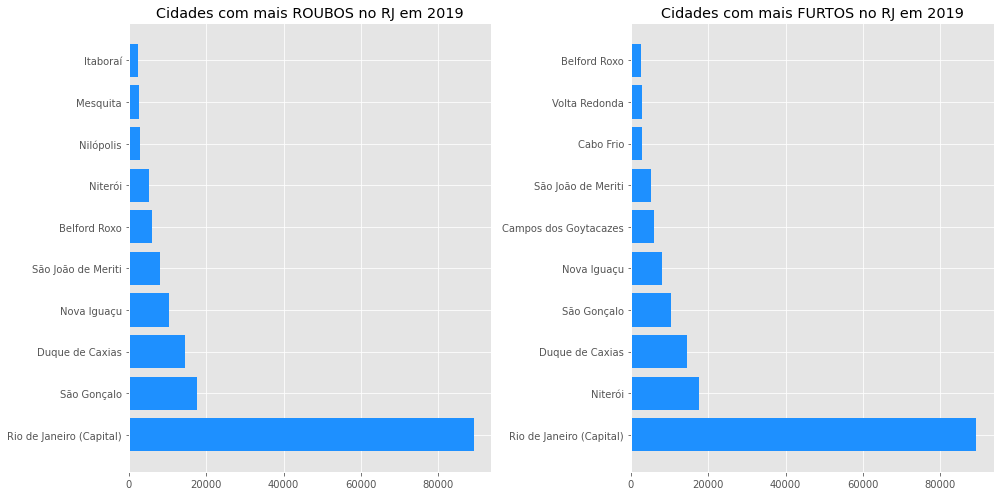

In [ ]:
#plotar gráfico
fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].barh(city1["municipio_fato"], city1["total_rbft"],align="center",color="dodgerblue")
ax[1].barh(city2["municipio_fato"], city1["total_rbft"],align="center",color="dodgerblue")
ax[0].set_title("Cidades com mais ROUBOS no RJ em 2019")
ax[1].set_title("Cidades com mais FURTOS no RJ em 2019")

plt.tight_layout()
plt.show()

Observa-se que a maioria esmagadora das ocorrência de roubo e furto no estado do RJ, se dá na capital.

Em seguida, vamos comparar a ocorrência dos diferentes tipos de roubo e furtos no RJ.

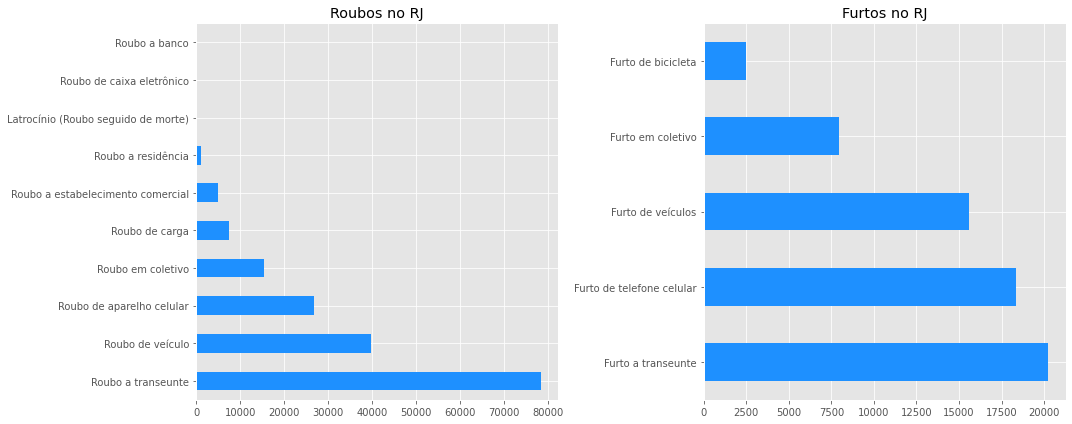

In [ ]:
#imprimir gráfico para comparação
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
roubo_rj["titulo_do"].value_counts().plot(kind="barh",ax=ax1,color="dodgerblue")
furto_rj["titulo_do"].value_counts().plot(kind="barh",ax=ax2,color="dodgerblue")
ax1.set_title("Roubos no RJ")
ax2.set_title("Furtos no RJ")
plt.tight_layout()

Os transeuntes tiveram mais ocorrência em relação aos outros tipos de crimes, tanto para roubo quanto para furto.

###Análise do Mês e Horário que ocorrem os crimes

Com intuito de entendermos em qual período do ano e em qual horário acontecem a maior quantidade de crimes relacionado a roubo e furto, iremos plotar graficos para análise.  

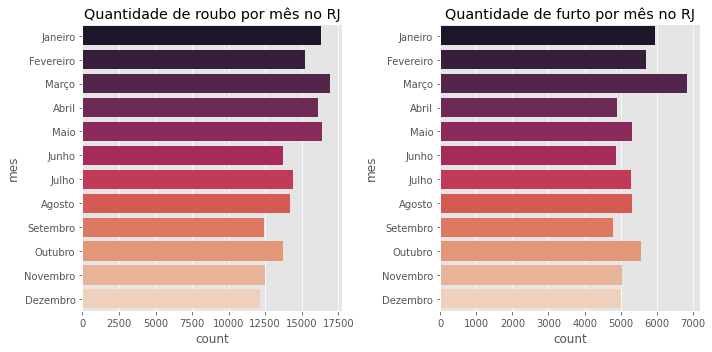

In [ ]:
#Plotar o gráfio
figu, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(y="mes", data=roubo_rj,ax=ax[0], palette='rocket')
sns.countplot(y="mes", data=furto_rj,ax=ax[1], palette='rocket')

ax[0].set_title("Quantidade de roubo por mês no RJ")
ax[1].set_title("Quantidade de furto por mês no RJ")
plt.tight_layout()

Observa-se que no primeiro semestre do ano houve uma quantidade ligeiramente maior de ocorrência, tanto para roubo quanto para furto, tendo o pico no mês de março.

Agora vamos analisar o horário que ocorrem a maior quantidade de casos

In [ ]:

#formantar a hora da ocorrência
df_rj["hora_fato"] = df_rj["hora_fato"].replace("99", np.NaN)
df_rj['hora_fato'] = pd.to_datetime(df_rj['hora_fato'], errors='coerce')
df_rj['hora_fato'] = pd.to_datetime(df_rj['hora_fato'], format='%H:%M', errors='coerce').dt.time

#pegar os valroes não nulos
nao_nulos = df_rj['hora_fato'].notnull()
pontos_rj = df_rj[nao_nulos]

#criar uma lista com os valores
lista = pd.Series.tolist(pontos_rj['hora_fato'])
new_list_rj = []
for item in lista:
    new_list_rj.append(item.hour)
    
hora_rj = pd.DataFrame(new_list_rj, columns = ['QTD']) # criar um dateframe com a lista
hora_rj = pd.DataFrame(hora_rj['QTD'].value_counts()) # contar a quantidade de cada valor
hora_rj['HORA'] = hora_rj.index

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quantidade de ocorrência por hora no Rio de Janeiro')

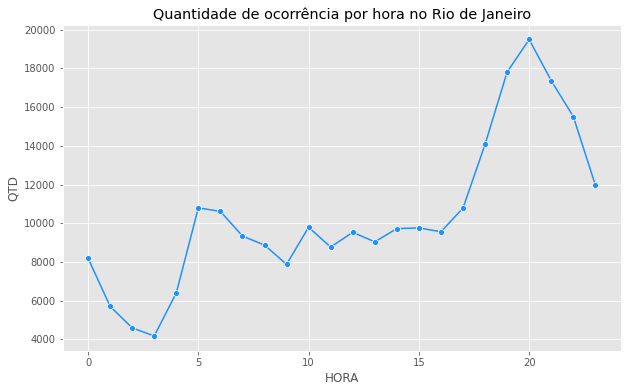

In [ ]:
#Plotar gráfico QTD BO versus hora
fi, ax = plt.subplots(figsize=(10,6))

sns.lineplot(hora_rj.HORA, hora_rj.QTD, marker="o", color='dodgerblue')

ax.set_title("Quantidade de ocorrência por hora no Rio de Janeiro")

O gráfico mostra que a maior quantidade de casos ocorrem a noite tendo o pico às 20h.

###Análise de crimes relacionados à vida

Após temos realizado a análise de roubo e furto, nos iremos agora analisar os crimes relacionados à vida. Primeiro, iremos verificar as cidades do estado do RJ que possuem a maior quantidade de casos e em seguida examinar a média de idade das vítimas.

In [ ]:
#Selecionando os dados classificados como Homicídio doloso
hom_doloso = df_rj.loc[df_rj["titulo_do"] == 'Homicídio doloso'] # apenas os dados de roubo no RJ

#Agrupando as 10 cidades com maior ocorrência de roubos e furtos
cidades = hom_doloso[['titulo_do', 'municipio_fato']].groupby('municipio_fato', 
                as_index=False).count().sort_values(by='titulo_do', ascending=False)[:10]


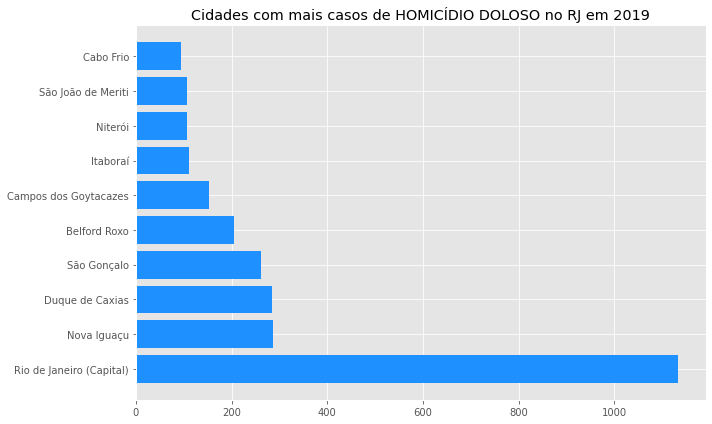

In [ ]:
#plotar gráfico
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(cidades["municipio_fato"], cidades["titulo_do"],align="center",color="dodgerblue")
ax.set_title("Cidades com mais casos de HOMICÍDIO DOLOSO no RJ em 2019")


plt.tight_layout()
plt.show()

O gráfico mostra que a cidade que ocorre a maior quantidade de casos é a capital Rio de Janeiro, tento os números muito superior as outras cidades.

Após analise das cidades com mais casos, vamos verificar a média da idade das vítimas do crime homicídio doloso

In [ ]:
#Calcular a média das idades para o sexo masculino e feminino
vitimas = hom_doloso[['sexo', 'conteudo', "idade"]].loc[(((hom_doloso['sexo'].str.contains('feminino')) | (hom_doloso['sexo'].str.contains('masculino')))

         & (hom_doloso['sexo'].isna() == False)) & (((hom_doloso['conteudo'].str.contains('vítimas')))
        
         & (hom_doloso['conteudo'].isna() == False)) & ((hom_doloso['idade'].isna() == False))].groupby(['sexo'], as_index=False).mean()

Text(0, 0.5, 'Idade Média')

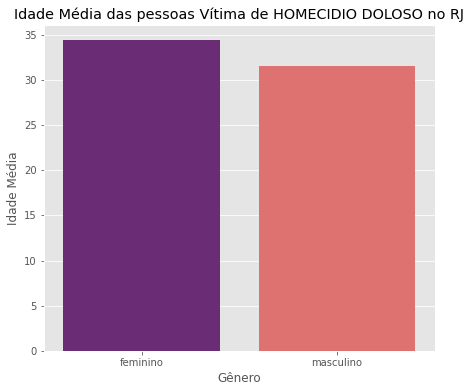

In [ ]:
#Plotar gráfico 
fig, ax = plt.subplots(figsize = (7,6))
sns.barplot(x="sexo", y="idade", data=vitimas, palette = 'magma')
ax.set_title("Idade Média das pessoas Vítima de HOMICÍDIO DOLOSO no RJ")
ax.set_xlabel("Gênero")
ax.set_ylabel("Idade Média")

Podemos observar que o gênero masculino teve uma média em torno de 31 anos em quanto o feminino teve 34 anos como média. 

#Conclusão

Foi realizado uma análise exploratório do conjunto de dados do Instituto de Segurança Pública do Rio de Janeiro, foi possivel perceber dados ausentes para algumas variáveis, mas isso é algo normal porque se trata de uma base de dados real.

Todavia, os dados mostram a criminalidade alta no estado do RJ, principalmente na capital. Em vista que, a maioria dos casos de homicídio doloso, roubo e furtos possuem números superiores comparados a outras cidades do estado.